In [1]:
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use('ggplot')

In [2]:
data = pd.read_csv("C:/Datasets/Language Detection.csv")

In [3]:
print("Data shape :", data.shape)
data.head(10)

Data shape : (10337, 2)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
languages = data['Language'].unique()
dt = []
for language in languages:
    r = random.randint(0,20)
    text = data[data.Language == language].iloc[r].Text
    dt.append((text, language))

df = pd.DataFrame(dt, columns=['Text', 'Language'])
df

,Text,Language
0,"Although humans are part of nature, human acti...",English
1,ലാഭേച്ഛയില്ലാതെ പ്രവർത്തിക്കുന്ന വിക്കിമീഡിയ ഫ...,Malayalam
2,"यह परियोजना के बारे में बार बार, अक्सर अन्य वे...",Hindi
3,"இது ஹவாய் மொழியில் ""விரைவு"" எனப் பொருள்படும் வ...",Tamil
4,[4] A revista tem uma circulação semanal de ce...,Portugeese
5,C'est cette opposition qui sera plus tard repr...,French
6,Wikipedia wordt gepubliceerd onder een vrije l...,Dutch
7,"Según los Journal Citation Reports, la revista...",Spanish
8,"Η Βικιπαίδεια αναπτύσσεται στον ιστοχώρο, που ...",Greek
9,Большинство направляемых в Nature статей отсеи...,Russian


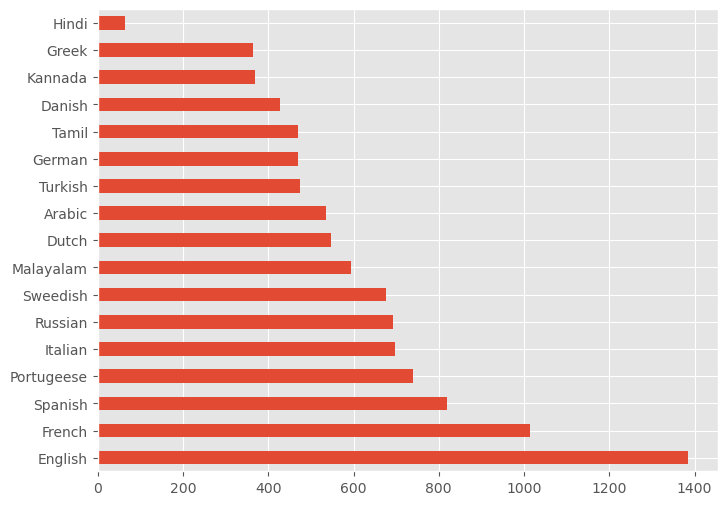

In [5]:
plt.figure(figsize = (8,6))
data['Language'].value_counts().plot(kind = 'barh')
plt.show()

In [6]:
X = data['Text']
y = data['Language']

In [7]:
Label_encoder = LabelEncoder()
y = Label_encoder.fit_transform(y)

In [8]:
preprocessed_text = []
for text in X:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[ [ ]', ' ', text)
    text = re.sub(r'[ ] ]', ' ', text)
    text = re.sub(r'[\n]', ' ', text)
    text = text.rstrip().lstrip()
    text = text.lower()
    preprocessed_text.append(text)

In [9]:
CV = CountVectorizer()
X = CV.fit_transform(preprocessed_text).toarray()
X.shape

(10337, 39404)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (8269, 39404)
X_test shape : (2068, 39404)
y_train shape : (8269,)
y_test shape : (2068,)


In [11]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy_score_ = accuracy_score(y_test, y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)

print("Accuracy of the model :", accuracy_score_)

Accuracy of the model : 0.9772727272727273


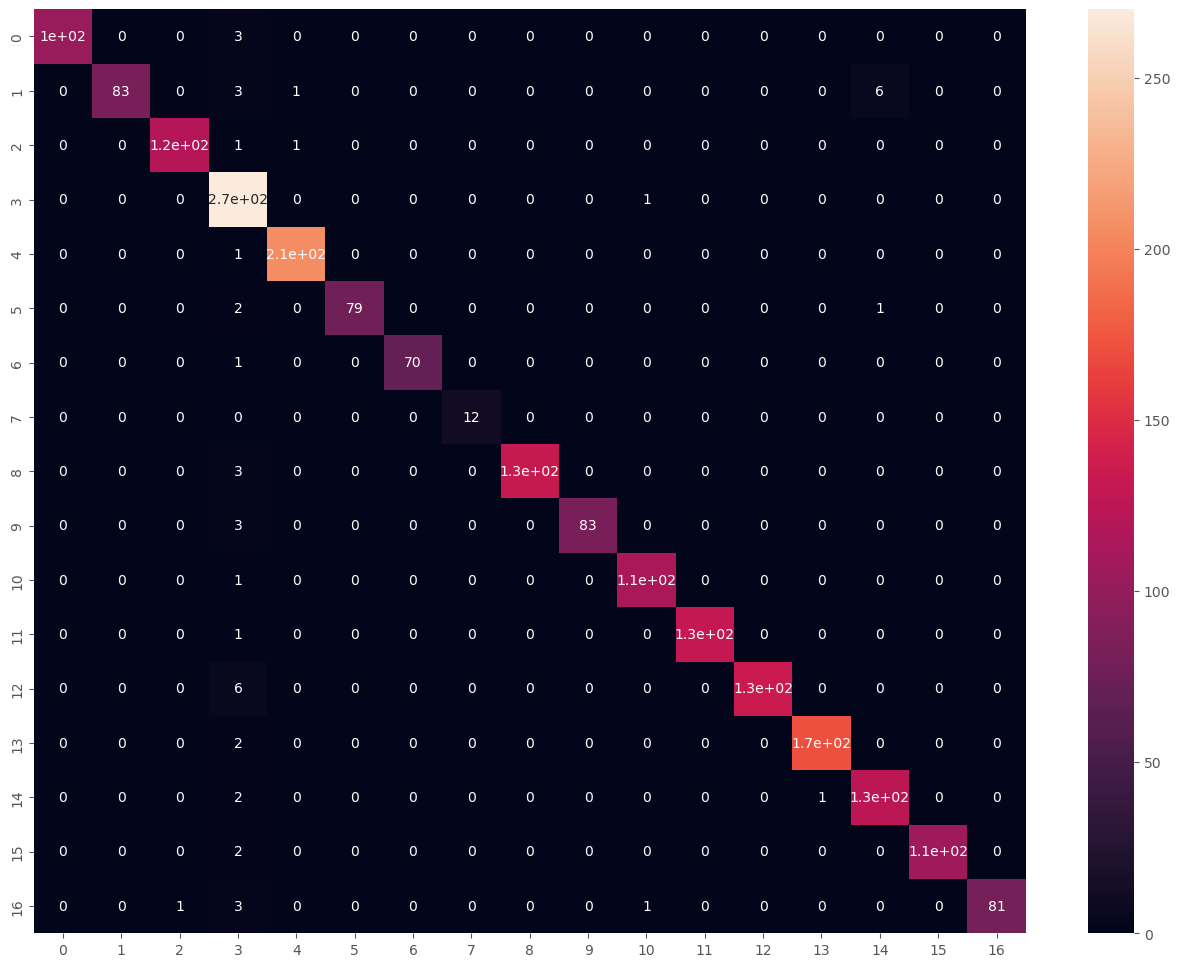

In [14]:
plt.figure(figsize = (16,12))
sns.heatmap(confusion_matrix_, annot = True)
plt.show()

In [15]:
def predict(text):
    x = CV.transform([text]).toarray()
    language = model.predict(x)
    language = Label_encoder.inverse_transform(language)
    print(f"The language is in {language[0]}.")

In [16]:
Text1 = "the weather today is amazing"
predict(Text1)

The language is in English.


In [17]:
Text2 = "le temps aujourd'hui est incroyable"
predict(Text2)

The language is in French.


In [18]:
Text3 = "الطقس اليوم رائع"
predict(Text3)

The language is in Arabic.


In [19]:
Text4 = "मौसम आज अद्भुत है"
predict(Text4)

The language is in Hindi.
